# Introduction
In this note, we illustrate how to caculate customer retention rate via cohort analysis approach. Later we will calculate customer lifetime values based on cohorts. These two KPIs are frequently used in startups to track business performance under different policies.

Let us take a look at data.

In [1]:
import pandas as pd
data = pd.read_csv('C:/data/LTV_by_cohort.csv')
data.head()

,increment_id,status,created_at,customer_id,gross_order_revenue
0,200095401,complete,2/1/2015 2:53,1000477,74.95
1,200095423,complete,2/1/2015 6:04,1000478,84.95
2,200095430,complete,2/1/2015 6:55,1000479,220.89
3,200095436,complete,2/1/2015 7:41,1000480,182.99
4,200095440,complete,2/1/2015 8:03,1000481,32.99


It is important to distinguish OrderPeriod and CohortGroup, and the latter refers to the month customers first engaged with our business.

In [2]:
data['date'] = data.created_at.str.split(expand=True)[0]
data['datetime'] =  pd.to_datetime(data['date'], format='%m/%d/%Y')
data['OrderMonth'] = data.datetime.dt.to_period('M').astype(str)
data['Cohort'] = data.groupby('customer_id')['OrderMonth'].transform(min)
data.head(15)

,increment_id,status,created_at,customer_id,gross_order_revenue,date,datetime,OrderMonth,Cohort
0,200095401,complete,2/1/2015 2:53,1000477,74.95,2/1/2015,2015-02-01,2015-02,2015-02
1,200095423,complete,2/1/2015 6:04,1000478,84.95,2/1/2015,2015-02-01,2015-02,2015-02
2,200095430,complete,2/1/2015 6:55,1000479,220.89,2/1/2015,2015-02-01,2015-02,2015-02
3,200095436,complete,2/1/2015 7:41,1000480,182.99,2/1/2015,2015-02-01,2015-02,2015-02
4,200095440,complete,2/1/2015 8:03,1000481,32.99,2/1/2015,2015-02-01,2015-02,2015-02
5,200095472,complete,2/1/2015 12:14,1000390,19.99,2/1/2015,2015-02-01,2015-02,2015-02
6,200095474,complete,2/1/2015 12:15,1000482,65.00,2/1/2015,2015-02-01,2015-02,2015-02
7,200095476,complete,2/1/2015 12:28,1000483,154.95,2/1/2015,2015-02-01,2015-02,2015-02
8,200095491,complete,2/1/2015 14:33,1000484,260.95,2/1/2015,2015-02-01,2015-02,2015-02
9,200095497,complete,2/1/2015 15:06,1000485,59.99,2/1/2015,2015-02-01,2015-02,2015-02


In [3]:
grouped = data.groupby(['Cohort', 'OrderMonth'])
cohorts = grouped.agg({'customer_id': pd.Series.nunique,
                       'gross_order_revenue': 'sum'})
cohorts.head(15)

customer_id  gross_order_revenue
Cohort  OrderMonth                                  
2015-02 2015-02             879            158479.85
        2015-03              21              2851.21
        2015-04              25              4877.02
        2015-05              25              5117.84
        2015-06              17              3279.42
        2015-07              16              2562.26
        2015-08              16              4060.46
        2015-09              14              2139.31
        2015-10              13              3885.19
        2015-11              39              6473.58
        2015-12              57              9539.41
        2016-01              26              5739.68
        2016-02              52              6992.58
        2016-03              23              5193.11
2015-03 2015-03             709            127847.91

In [4]:
cohorts.rename(columns={'customer_id': 'total_customers',
                        'gross_order_revenue': 'total_revenue'}, inplace=True)
cohorts.head(15)

total_customers  total_revenue
Cohort  OrderMonth                                
2015-02 2015-02                 879      158479.85
        2015-03                  21        2851.21
        2015-04                  25        4877.02
        2015-05                  25        5117.84
        2015-06                  17        3279.42
        2015-07                  16        2562.26
        2015-08                  16        4060.46
        2015-09                  14        2139.31
        2015-10                  13        3885.19
        2015-11                  39        6473.58
        2015-12                  57        9539.41
        2016-01                  26        5739.68
        2016-02                  52        6992.58
        2016-03                  23        5193.11
2015-03 2015-03                 709      127847.91

In [5]:
cohort_group_size = cohorts['total_customers'].groupby(level=0).first()
cohort_group_size.head(20)

Cohort
2015-02     879
2015-03     709
2015-04     746
2015-05     817
2015-06     632
2015-07     755
2015-08     685
2015-09     727
2015-10     803
2015-11    2137
2015-12    3770
2016-01    1204
2016-02    1981
2016-03    1191
Name: total_customers, dtype: int64

In [6]:
cohorts['total_customers'].unstack(-1)

OrderMonth,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03
Cohort,,,,,,,,,,,,,,
2015-02,879.0,21.0,25.0,25.0,17.0,16.0,16.0,14.0,13.0,39.0,57.0,26.0,52.0,23.0
2015-03,NaN,709.0,16.0,12.0,19.0,13.0,9.0,12.0,15.0,37.0,38.0,16.0,30.0,23.0
2015-04,NaN,NaN,746.0,23.0,16.0,16.0,20.0,17.0,10.0,55.0,44.0,15.0,29.0,20.0
2015-05,NaN,NaN,NaN,817.0,20.0,14.0,14.0,10.0,9.0,34.0,58.0,15.0,27.0,12.0
2015-06,NaN,NaN,NaN,NaN,632.0,15.0,11.0,8.0,14.0,25.0,34.0,19.0,15.0,13.0
2015-07,NaN,NaN,NaN,NaN,NaN,755.0,30.0,10.0,13.0,38.0,40.0,19.0,33.0,22.0
2015-08,NaN,NaN,NaN,NaN,NaN,NaN,685.0,24.0,17.0,33.0,33.0,11.0,17.0,13.0
2015-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.0,33.0,30.0,41.0,30.0,26.0,18.0
2015-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.0,60.0,65.0,31.0,32.0,24.0


In [7]:
customer_retention = cohorts['total_customers'].unstack(-1).divide(cohort_group_size, axis=1)
customer_retention

OrderMonth,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03
Cohort,,,,,,,,,,,,,,
2015-02,1.0,0.029619,0.033512,0.030600,0.026899,0.021192,0.023358,0.019257,0.016189,0.018250,0.015119,0.021595,0.026249,0.019312
2015-03,NaN,1.000000,0.021448,0.014688,0.030063,0.017219,0.013139,0.016506,0.018680,0.017314,0.010080,0.013289,0.015144,0.019312
2015-04,NaN,NaN,1.000000,0.028152,0.025316,0.021192,0.029197,0.023384,0.012453,0.025737,0.011671,0.012458,0.014639,0.016793
2015-05,NaN,NaN,NaN,1.000000,0.031646,0.018543,0.020438,0.013755,0.011208,0.015910,0.015385,0.012458,0.013629,0.010076
2015-06,NaN,NaN,NaN,NaN,1.000000,0.019868,0.016058,0.011004,0.017435,0.011699,0.009019,0.015781,0.007572,0.010915
2015-07,NaN,NaN,NaN,NaN,NaN,1.000000,0.043796,0.013755,0.016189,0.017782,0.010610,0.015781,0.016658,0.018472
2015-08,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.033012,0.021171,0.015442,0.008753,0.009136,0.008582,0.010915
2015-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.041096,0.014038,0.010875,0.024917,0.013125,0.015113
2015-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.028077,0.017241,0.025748,0.016153,0.020151


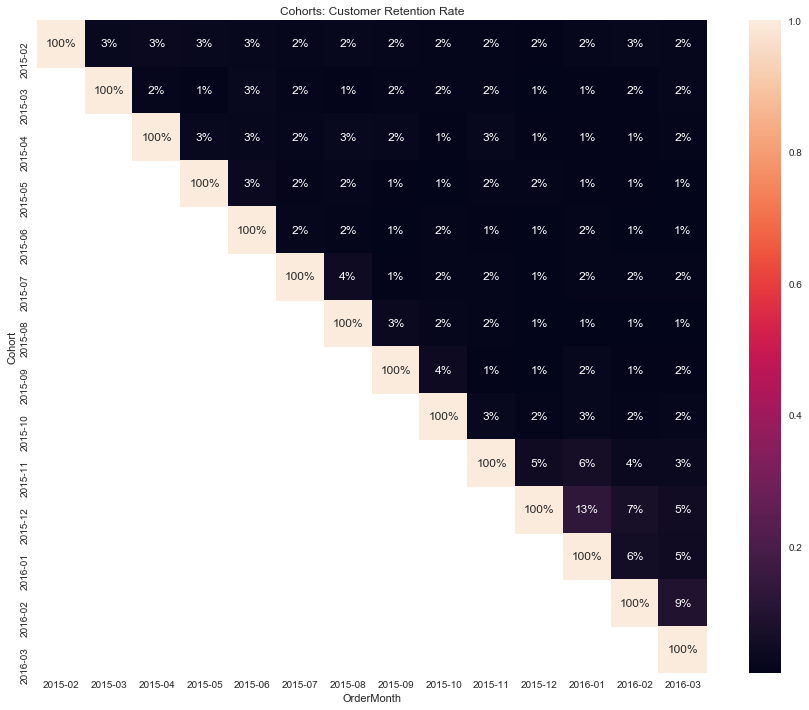

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(15, 12))
plt.title('Cohorts: Customer Retention Rate')
sns.heatmap(customer_retention, mask=customer_retention.isnull(), annot=True, fmt='.0%');